They basically do the same thing (as you noticed) but the difference is that OrdinalEncoder is used to convert the features, while LabelEncoder for the target variable.
OrdinalEncoder in fact can fit multiple columns at the same time while LabelEncoder can only fit a vector of samples, but no one prevents you from preprocessing the columns one at a time with the second one.

we generally use ordinal encoder to encode the independent features, while LabelEncoder is mainly used for encoding the target variable.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

In [18]:
mr = pd.read_csv("mushrooms.csv")

In [9]:
mr1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [10]:
mr1.shape

(8124, 23)

In [17]:
mr1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [19]:
mr["cap-shape"].value_counts()

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

# Prepare inputs

source code: https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [22]:
X = mr.loc[:, mr.columns != 'class']
y = mr.loc[:, mr.columns == 'class']

In [23]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [24]:
y.head()

,class
0,p
1,e
2,e
3,p
4,e


In [25]:
X = X.astype(str)

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 1)

In [32]:
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (5443, 22) (5443, 1)
Test (2681, 22) (2681, 1)


In [35]:
def prepare_inputs(X_train,X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc,X_test_enc

def prepare_targets(y_train,y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc,y_test_enc

In [36]:
X_train_enc,X_test_enc = prepare_inputs(X_train,X_test)
y_train_enc,y_test_enc = prepare_targets(y_train,y_test)


/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
X_train_enc.shape

(5443, 22)

In [39]:
X_train.shape

(5443, 22)

In [41]:
X_train_enc

array([[3., 3., 2., ..., 7., 4., 2.],
       [2., 0., 3., ..., 2., 0., 1.],
       [2., 0., 4., ..., 2., 5., 0.],
       ...,
       [2., 3., 3., ..., 1., 4., 1.],
       [5., 0., 8., ..., 3., 4., 0.],
       [5., 2., 0., ..., 1., 4., 1.]])

## Perform feature selection with chi-squared as evaluation metric

In [46]:
# Select indicator/metrics to rank and choose features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature selection: using chisquared indicator
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)


Feature 0: 10.397708
Feature 1: 155.341114
Feature 2: 10.623323
Feature 3: 776.863709
Feature 4: 73.306878
Feature 5: 2.236022
Feature 6: 582.399091
Feature 7: 1070.687525
Feature 8: 3904.241234
Feature 9: 25.863510
Feature 10: 739.638652
Feature 11: 147.616648
Feature 12: 136.001199
Feature 13: 86.400905
Feature 14: 78.633218
Feature 15: nan
Feature 16: 3.299083
Feature 17: 18.409995
Feature 18: 1287.734355
Feature 19: 231.222531
Feature 20: 206.417198
Feature 21: 551.890378


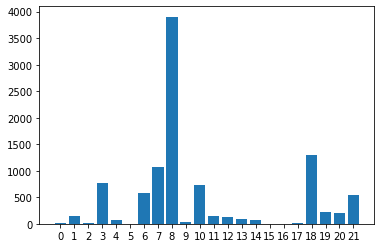

In [49]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(np.arange(0, 22, step=1))
plt.show()

## Perform feature selection with mutual information as evaluation metric

Feature 0: 0.024061
Feature 1: 0.021677
Feature 2: 0.021861
Feature 3: 0.127524
Feature 4: 0.631724
Feature 5: 0.020990
Feature 6: 0.057157
Feature 7: 0.152950
Feature 8: 0.285338
Feature 9: 0.017905
Feature 10: 0.085851
Feature 11: 0.198463
Feature 12: 0.177563
Feature 13: 0.171979
Feature 14: 0.146634
Feature 15: 0.000000
Feature 16: 0.010793
Feature 17: 0.026209
Feature 18: 0.220030
Feature 19: 0.329536
Feature 20: 0.132074
Feature 21: 0.112121


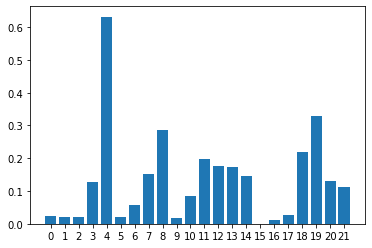

In [50]:
from sklearn.feature_selection import mutual_info_classif

# feature selection: using chisquared indicator
def select_features_mutual_info(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features_mutual_info(X_train_enc, y_train_enc, X_test_enc)

# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(np.arange(0, 22, step=1))
plt.show()


### A robust approach is to evaluate models using different feature selection methods (and numbers of features) and select the method that results in a model with the best performance.

#### In this section, we will evaluate a Logistic Regression model with all features compared to a model built from features selected by chi-squared and those features selected via mutual information.

##### 1. Logistic Regression model using all features

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [55]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_enc)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 95.19


/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


##### 2. Logistic Regression model using Chi-Squared features

In [110]:
# feature selection, chi2, 10 best features only
def select_features_4_chi2(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=13)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

X_train_fs_chi2, X_test_fs_chi2 = select_features_4_chi2(X_train_enc, y_train_enc, X_test_enc)

In [111]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs_chi2, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs_chi2)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 93.47


In this case, we see that the model achieved an accuracy of about 93.4%, a slight drop in performance.

It is possible that some of the features removed are, in fact, adding value directly or in concert with the selected features.

##### 3. Logistic regression model using Mutual Information Features

In [112]:
# feature selection: using chisquared indicator
def select_features_mutual_info(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k=13)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

X_train_fs_mi, X_test_fs_mi = select_features_mutual_info(X_train_enc, y_train_enc, X_test_enc)

In [113]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs_mi, y_train_enc)
# evaluate the model
yhat = model.predict(X_test_fs_mi)
# evaluate predictions
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 92.24


/Users/cuongthan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In this case, we can see a small lift in classification accuracy to 76%.

To be sure that the effect is real, it would be a good idea to repeat each experiment multiple times and compare the mean performance. It may also be a good idea to explore using k-fold cross-validation instead of a simple train/test split.